-- Exploratory data analysis-- 

    Analiza el conjunto de datos con el objetivo de resumir sus características principales, generalmente a través de medios visuales. 
    La finalidad es ver que pueden decirnos los datos más alla del modelado formal o las pruebas de hipótesis
    

Fuente: https://en.wikipedia.org/wiki/Exploratory_data_analysis

Data Mining de la muestra extraida de Twitter. Es muy probable que con el paso del tiempo debido a la ampliación de necesidades se incremente la muestra. 

Al obtener el dataset ya se hicieron algunos pasos de data mining como: 

* Supresión de cuentas a las que hace referencia (@XXXX) y aglutinación de múltiples espacios en uno
* Eliminación de páginas web (http,https y www) (str.replace('http\S+|www.\S+', '', case=False))
* Eliminación del símbolo # que hace referencia a los hastag
* Supresión de comentarios duplicados una vez que se elimina todo lo anterior

Este dataset contiene lenguaje tóxico que es el que se está analizando. 

In [1]:
import pandas as pd
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
import numpy as np
from emoji import UNICODE_EMOJI
from nltk import bigrams 

%matplotlib inline

# Lectura de la muestra

In [2]:
df = pd.read_csv("C:/Users/Esperanza/Desktop/UOC/TFM/python/comentarios_toxicos.csv", sep=';',usecols=[0,1])
df.iloc[264,:]

texto     _efs Juego sucio no, barriobajero.
toxico                                     1
Name: 264, dtype: object

# Data Cleaning 

**1) Eliminación de todas las palabras que empiecen por '_' ya que no nos dan información. **

*_Zaragoza_ Cállese burro, lea libros y tuitee menos, botarate. ;1;*

In [3]:
#Función que elimina la palabra que empiece por el caracter (char) en el texto(text)
def delete_starting_with(text, char):
    text=' '.join(word for word in text.split(' ') if not word.startswith(char))
    return text

In [4]:
df['texto']=df['texto'].apply(lambda txt: delete_starting_with(txt, '_') )
df['texto']=df['texto'].replace('_','')
df.iloc[264,:]

texto     Juego sucio no, barriobajero.
toxico                                1
Name: 264, dtype: object

**2) Eliminación de las comillas. **

*"""Tú eres tan cabrón que los estás jodiendo"" ""Que pongan el aire más alto así nos infectamos"" ""Estos hijos de puta se tienen que ir a su país"" ""Que esto es España joder"" ""Dentro de poco esto va a estar lleno de ratas y nos vamos a infectar todos"" ""Me están tocando los huevos"""*

In [5]:
df.iloc[2,:]

texto     "Tú eres tan cabrón que los estás jodiendo" "Q...
toxico                                                    1
Name: 2, dtype: object

In [6]:
df['texto']=df.texto.apply(lambda x: x.replace('\"',''))
df.iloc[2,:]

texto     Tú eres tan cabrón que los estás jodiendo Que ...
toxico                                                    1
Name: 2, dtype: object

# Análisis

** Descripción general del dataset**

In [7]:
#Dimensiones del corpus obtenido de Twitter sobre lenguaje tóxico
print("Número de filas : "+str(df.shape[0]))
print("Número de columnas : "+str(df.shape[1]))

Número de filas : 530
Número de columnas : 2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 2 columns):
texto     530 non-null object
toxico    530 non-null int64
dtypes: int64(1), object(1)
memory usage: 8.4+ KB


Donde se puede ver que no hay ningún valor a nulo. gracias a reconocerlos con: 

In [9]:
df[df.isnull().any(axis=1)].head()

,texto,toxico


** Cuenta del número de signos de admiración en mayúsculas como signo de exaltación. **

*ENTRETÉNME, PAYASO!!!... *

In [10]:
#Creación de la columna que cuenta el número de veces que aparece un símbolo
df['num_admir']=df.texto.apply(lambda txt: txt.count('!') )

In [11]:
df.iloc[194,:]

texto        ENTRETÉNME, PAYASO!!!... 
toxico                               1
num_admir                            3
Name: 194, dtype: object

**Cuenta del número de palabras en mayúsculas como signo de exaltación. **

*ENTRETÉNME, PAYASO!!!... *

In [12]:
regex = r"\B[A-Z]+\b"
frase = "Que Valls será un mierdaseca, que nadie lo discute, pero que está ofreciendo sus votos GRATIS CHABALADA. No he visto todavía a la derecha catalana hacer lo mismo"

In [13]:
#Búsqueda las palabras en mayúsculas a través de una expresión regular
df['num_may']=df.texto.apply(lambda txt: len(list(re.finditer(regex, txt))) )
#matches = list(re.finditer(regex, frase))
#type(matches)
df.iloc[194,:]

texto        ENTRETÉNME, PAYASO!!!... 
toxico                               1
num_admir                            3
num_may                              2
Name: 194, dtype: object

**Tokenización de los textos. **

In [14]:
series_token=df.texto.apply(lambda txt: print(word_tokenize(txt)))


['que', 'asco', 'de', 'cabron']
['Felipe', '.', 'Cállate', ',', 'cabrón', '.', '¿Con', 'qué', 'cara', 'te', 'atreves', 'a', 'hablar', 'sobre', 'construcción', 'de', 'refinerías', '?']
['Tú', 'eres', 'tan', 'cabrón', 'que', 'los', 'estás', 'jodiendo', 'Que', 'pongan', 'el', 'aire', 'más', 'alto', 'así', 'nos', 'infectamos', 'Estos', 'hijos', 'de', 'puta', 'se', 'tienen', 'que', 'ir', 'a', 'su', 'país', 'Que', 'esto', 'es', 'España', 'joder', 'Dentro', 'de', 'poco', 'esto', 'va', 'a', 'estar', 'lleno', 'de', 'ratas', 'y', 'nos', 'vamos', 'a', 'infectar', 'todos', 'Me', 'están', 'tocando', 'los', 'huevos']
['Jajajajaja', 'Qué', 'cabrón']
['Ja', 'ja', ',', 'cabrón', '😅']
['HIJO', 'DE', 'PUTA', ',', 'COMO', 'TE', 'ATREVES', 'A', 'PONER', 'ESE', 'EMOJI']
['Cínico', 'hijo', 'de', 'la', 'gran', 'puta', '.']
['Mis', 'padres', 'estaban', 'buscando', 'casa', 'y', 'llamo', 'el', 'vendedor', 'de', 'la', 'casa', '.', 'Yo', 'cogí', 'el', 'teléfono', 'y', 'empecé', 'a', 'insultarte', '(', 'gilipollas'

** Cuenta del número de emoticonos . **


In [15]:
import emoji
def extract_emojis(str):
  return ' '.join(c for c in str if c in emoji.UNICODE_EMOJI)

In [16]:
df['emojis']=df['texto'].apply(lambda txt: extract_emojis(txt))

In [17]:
df['num_emoji']=df[df.emojis != '']['emojis'].apply(lambda txt: int(len(txt.split(' '))))
df.num_emoji=df.num_emoji.fillna(0)
df.num_emoji=df.num_emoji.astype(int)
df.num_emoji.iloc[1]

0

In [18]:
aux=df[df.num_emoji != 0]['emojis'].tolist()
#set(aux)

**Label del número de palabras identificadas como tóxicas en en corpus **

In [19]:
import re
from unicodedata import normalize
# necesitamos quitar los acentos y las diéresis para no sustituir palabras como moño a mono (no podemos utilizar la libreia unicode)
#Pasamos todo el texto a minúsculas
#Quitamos acentos y diéresis 
def estandarización(string):
    res=string.lower()
    res=re.sub(r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", normalize( "NFD", res), 0, re.I)
    res=normalize( 'NFC', res)
    return res

In [20]:
### Librería de insultos
# Obtenida de https://listas.20minutos.es/lista/insultos-en-castellano-que-deberias-conocer-y-su-significado-393340/
path_lib_insultos="C:/Users/Esperanza/Desktop/UOC/TFM/python/libreria_insultos.txt"

In [21]:
# Lectura de la anterior librería
with open(path_lib_insultos, encoding='utf8') as f:
    lista_insultos = f.read().splitlines()

# Supresión de mayúsculas y acentos debido a que en las redes sociales es muy común no utilizarlos. 
estand_lib_ins = []
for i in lista_insultos:
    estand_lib_ins.append(estandarización(i))

In [22]:
#Obtenemos un label con la cantidad de veces que aparece una palabra considerada como tóxica. 
def num_insultos(texto): 
    return len([word for word in texto.split() if word in estand_lib_ins])

In [23]:
df['num_insultos']=df['texto'].apply(lambda txt: num_insultos(estandarización(txt)))

In [24]:
df[df.num_insultos == 2]

,texto,toxico,num_admir,num_may,emojis,num_emoji,num_insultos
2,Tú eres tan cabrón que los estás jodiendo Que ...,1,0,0,,0,2
111,Hay que ser capullo para escribir eso. Yo no v...,1,0,0,,0,2
213,Es un vil pelele y fantoche,1,0,0,,0,2


**A quién va dirigido **

In [25]:
# Definición de la función que identificará si las frase es no incluyente
lista=['eres',"es", 'son', 'sois']# Uno de los atrones comunes cuando se insulta es utilizar el verbo ser no incluyente

def otra_persona(texto):
    res=0
    for elem in lista: 
        if(texto.find(elem) != -1 ): res=1
    return res


In [26]:
#Creación de la columna que comprueba la no unclisuión de la primera persona
df["dir_23ps"]=df.texto.map(lambda txt:otra_persona(txt) )

In [27]:
#Comprobación
set(df["dir_23ps"].tolist())

{0, 1}

** Nivel de toxicidad a través de los emoticonos**

In [52]:
path_lib_emoji="C:/Users/Esperanza/Desktop/UOC/TFM/python/Libraries_Emojis.csv"
df_train = pd.read_csv(path_lib_emoji, sep=';')
df_train_aux=df_train[['EMOJIS', 'Neg']]
diccionario_neg=df_train_aux.set_index('EMOJIS').T.to_dict('dict')
#list(diccionario_neg.keys())
diccionario_neg.get('🌌')['Neg']

0.12

In [53]:
def score_total_toxic(text):
    suma=[]
    try:
        suma=[diccionario_neg.get(value)['Neg'] for value in text.split() ]
        res=sum(float(i) for i in suma)/len(suma)
    except: 
        res=0
    return res

In [54]:
#Creación de la columna de nivel de toxicidad
df["score_emoji_tox"]=df.emojis[df.emojis !=''].map(lambda x: score_total_toxic(x))
df["score_emoji_tox"]=df.score_emoji_tox.fillna(0)

In [55]:
#set(df[df["score_emoji_tox"]].tolist())
#score_total_toxic('🌌 🌌 🌌')
#diccionario_neg.get('🌌')['Neg']
#data=['0.12', '0.12', '0.12']
#sum(float(i) for i in data)
df[df["score_emoji_tox"]!=0]
#df.emojis
#[value for value in df.emojis if value!='']

,texto,toxico,num_admir,num_may,emojis,num_emoji,num_insultos,dir_23ps,score_emoji_tox,filtered_words
4,"Ja ja , cabrón 😅",0,0,0,😅,1,1,0,0.012000,"[ja, ja, ,, cabrón, 😅]"
27,"El impoluto, según el porcino abrazafarolas de...",1,0,0,🤣 🐷 🤣 🐷 🤣 🐷 🤣 🐷 🤣 🐷 🤣 🐷 🤣,13,1,0,0.177769,"[impoluto,, según, porcino, abrazafarolas, 🤣🐷🤣..."
58,"Pues a mi me parece un tolai, pero vuelvo a de...",1,0,0,😊,1,0,1,0.060000,"[pues, parece, tolai,, vuelvo, decir..., q, ca..."
86,"Amor incondicional en estos animalitos, por al...",0,0,0,♥,1,0,1,0.035000,"[amor, incondicional, animalitos,, mejor, amig..."
87,El amor está en todas partes. 𝒥ℯ𝓁𝒾𝓏 𝒽ℴ𝓎♥︎.,0,0,0,♥,1,0,1,0.035000,"[amor, todas, partes., 𝒥ℯ𝓁𝒾𝓏, 𝒽ℴ𝓎♥︎., ]"
91,El momento semáforo se ha quedado grabado en m...,0,0,0,❤,1,0,0,0.044000,"[momento, semáforo, quedado, grabado, corazón, ❤]"
92,"Como Peatón también tenemos responsabilidades,...",0,0,0,👍,1,0,1,0.015000,"[peatón, responsabilidades,, asumirlas., esper..."
93,Lo único que he podido comprar en para poder s...,0,0,0,😫,1,1,1,0.485000,"[único, podido, comprar, poder, sumarme, seman..."
99,Se muda tu vecina tocapelotas?!! Como lo vas a...,1,2,0,🍸,1,0,0,0.092000,"[muda, vecina, tocapelotas?!!, vas, celebrar??..."
104,Este tío cada más tocapelotas...el señor parad...,1,0,1,😩,1,0,1,0.591000,"[tío, cada, tocapelotas...el, señor, paradonde..."


**Representación de las categorías **

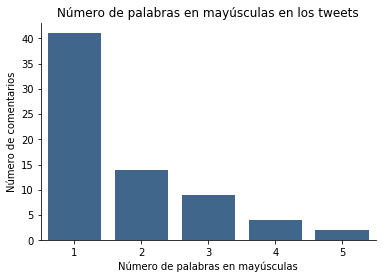

In [32]:
#Representación del número de palabras en mayúsuclas
#Se elimina el 0 por no ser siginificativo
dy = sns.countplot(data=df, x='num_may',color=(0.2, 0.4, 0.6),order = list(range(df.num_may.min()+1,6)))
dy.set(xlabel='Número de palabras en mayúsculas', ylabel = 'Número de comentarios')
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')
plt.title('Número de palabras en mayúsculas en los tweets')
plt.show()

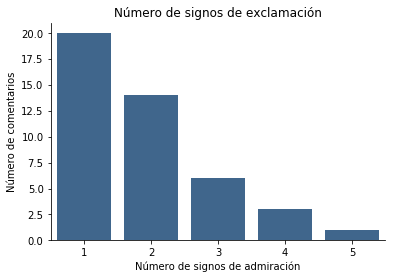

In [56]:
#Representación del número de palabras en mayúsuclas
#Se elimina el 0 por no ser siginificativo
dy = sns.countplot(data=df, x='num_admir',color=(0.2, 0.4, 0.6),order = list(range(df.num_admir.min()+1,6)))
dy.set(xlabel='Número de signos de admiración', ylabel = 'Número de comentarios')
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')
plt.title('Número de signos de exclamación')
plt.show()

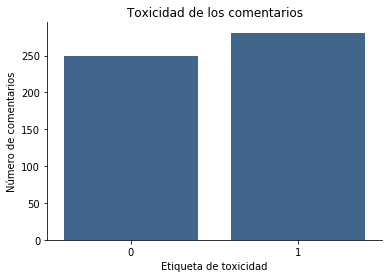

In [57]:
#Representación del número de palabras etiquetadas como tóxicas
dy = sns.countplot(data=df, x='toxico',color=(0.2, 0.4, 0.6))
dy.set(xlabel='Etiqueta de toxicidad', ylabel = 'Número de comentarios')
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')
plt.title('Toxicidad de los comentarios')
plt.show()

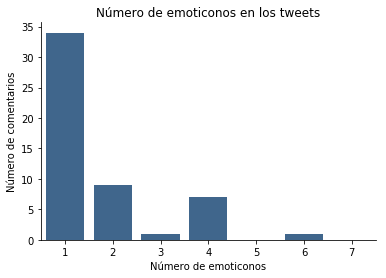

In [35]:
#Representación del número de palabras en mayúsuclas
#Se elimina el 0 por no ser siginificativo
dy = sns.countplot(data=df, x='num_emoji',color=(0.2, 0.4, 0.6),order = list(range(df.num_emoji.min()+1,8)))
dy.set(xlabel='Número de emoticonos', ylabel = 'Número de comentarios')
dy.spines['top'].set_color('none')
dy.spines['right'].set_color('none')
plt.title('Número de emoticonos en los tweets')
plt.show()

# Wordcloud

Da una idea generak sobre cuales son las palabras que tienen mas presencia en nuestro corpus. 

In [61]:
forb=stopwords.words('spanish')
forb.append("si")
forb.append("va")
forb.append("el")
forb.append("besugo")
forb.append("bien")
type(forb)

list

In [37]:
dfwc=df
#Supresión de las stopword en castellano
dfwc['filtered_words']=dfwc.texto.apply(lambda frase: [word.lower() for word in frase.split(' ') if word.lower() not in forb])
#Separación del dataframe en dataframe con lenguaje tóxico y dataframe sin lenguaje tóxico
df_pos=dfwc[dfwc.toxico == 0]
df_neg=dfwc[dfwc.toxico == 1]
#Conversión de la lista de listas a una sola lista con todas las palabras
slist_pos = [st for row in df_pos.filtered_words for st in row]
slist_neg = [st for row in df_neg.filtered_words for st in row]

In [38]:
#De lista a un string completo
neg_string = ' '.join(slist_neg)
pos_string = ' '.join(slist_pos)

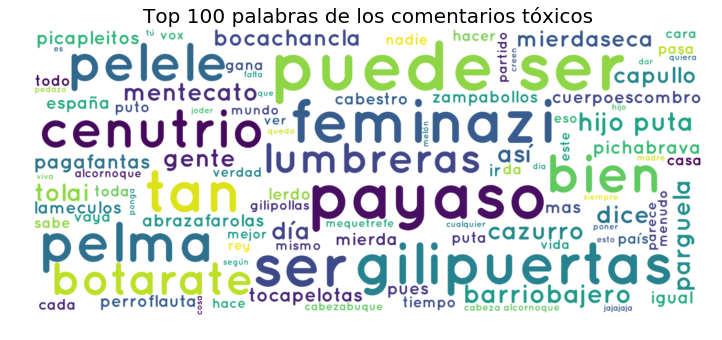

In [62]:
# Wordcloud de las palabras con significado negativo
wordcloud = WordCloud(width=1400, height=600, max_words=100, \
                      max_font_size=150,\
                      background_color="white",\
                      font_path='C:/Users/Esperanza/Desktop/UOC/TFM/python/Quicksand-Bold.otf').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 palabras de los comentarios tóxicos', fontsize=20)
plt.show()

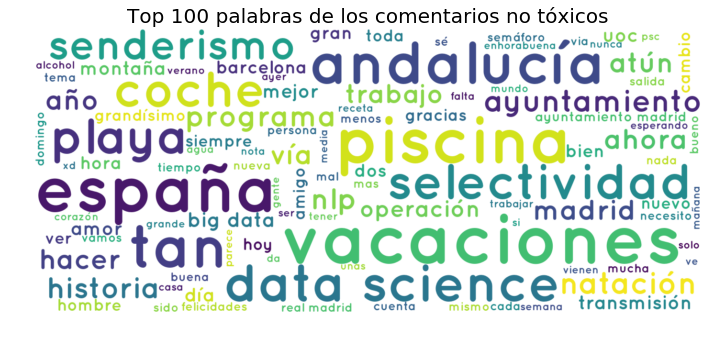

In [40]:
# Wordcloud de las palabras con significado no tóxico
wordcloud = WordCloud(width=1400, height=600, max_words=100, \
                      max_font_size=150,\
                      background_color="white",\
                      font_path='C:/Users/Esperanza/Desktop/UOC/TFM/python/Quicksand-Bold.otf').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 palabras de los comentarios no tóxicos', fontsize=20)

plt.show()

** Bigram**

Debido a  que el orden de las palabras es importante, se comprobará si hay alguno tipo de relación con las palabras que están una junta otra. 

Esta función toma una lista de tokens y produce una lista de tuplas con las palabrasque comunmente aparecen una junto a otra. 

In [41]:
import nltk, re, string, collections
from nltk.util import ngrams # function for making ngrams
preposiciones=['a','ante','bajo','cabe','con','contra','de','desde','en','entre','hacia','hasta','para','por','según','sin','so','sobre','tras']
conjunciones=['y', 'en', 'ni', 'o', 'u','mas', 'pero', 'sin embargo', 'no obstante', 'a pesar de', 'aunque']
stop= ['de', 'la','a','en', 'el','y', 'es', 'un','lo','que']
stop=stop+preposiciones+conjunciones


In [42]:
#Se toma la columna con los textos y se convierte a un string individual if not  if c in
uniendo=[]
[uniendo.append(row+' ') for row in df.texto ]
un_string=','.join(uniendo)
# No se quita mediante stopwords porque hay algunos incluidos en esa lista que se necesitan
un_string=un_string.replace('?', '').replace('¿', '').replace('.', '').replace('', '')\
                    .replace(',', '').replace('!', '').replace('¡', '').replace('”', '').replace('“', '')
res=[word.lower() for word in un_string.split(' ') if word not in stop ]

In [43]:
res_ngram = ngrams(res, 3)
# Se crea un diccionario collections.Counter que permitirá contras, ver el mínimo el máximo ...
esBigramFreq = collections.Counter(res_ngram)
esBigramFreq.most_common(10)

[(('no', 'se', 'puede'), 12),
 (('se', 'puede', 'ser'), 12),
 (('puede', 'ser', 'más'), 10),
 (('', '', ''), 10),
 (('data', 'science', ''), 4),
 (('', 'ofertas', 'trabajo'), 3),
 (('hijo', 'de', 'puta'), 2),
 (('son', 'los', 'mismos'), 2),
 (('porque', 'no', 'se'), 2),
 (('viva', 'españa', ''), 2)]

No concluyente, no nos proporciona más información

**Corrrelación**

Definida como la asociación/ relación entre variables.

 ** *Covarianza:*  ** Nos puede ayudar a calcular la posible correlación lineal entre las observaciones de dos variables cuantitativas. Primero, cada variable se centra restando su media. Estas puntuaciones centradas se multiplican juntas para medir si el aumento en una variable se asocia con el aumento en otra. Finalmente, el valor esperado (E) del producto de estas puntuaciones centradas se calcula como un resumen de la asociación. Intuitivamente, el producto de las puntuaciones centradas se puede considerar como el área de un rectángulo con la distancia de cada punto de la media que describe un lado del rectángulo. 
                        $$Cov(X, Y) = E $$
                        
El problema con la covarianza es que mantiene la escala de las variables X e Y, y por lo tanto puede tomar cualquier valor. Esto dificulta la interpretación y es imposible comparar covarianzas entre sí. Por ejemplo, Cov (X, Y) = 5.2 y Cov (Z, Q) = 3.1 nos dicen que estos pares están asociados positivamente, pero es difícil decir si la relación entre X e Y es más fuerte que Z y Q sin mirar A los medios y distribuciones de estas variables. Aquí es donde la correlación se vuelve útil: al estandarizar la covarianza mediante alguna medida de variabilidad en los datos, produce una cantidad que tiene interpretaciones intuitivas y una escala consistente.

Fuente: https://www.datascience.com/blog/introduction-to-correlation-learn-data-science-tutorials


**Coeficiente de correlación de Pearson**

** * Pearson* ** es el coeficiente de correlación más usado para medir la asociación entre variables CONTINUAS. Cuantifica el grado en el que la relación entre dos variables puede ser decrita por una linea. 

$$ \rho_{X,Y} = \frac{E[(X-\mu_{X})(Y-\mu_{Y})] }{\sigma_{X}\sigma_{Y}}$$

Cuanto más esté ρ a 1, más dependencia hay entre las dos variables y el incremento en una variable resulta en el incremento en otra mientras que si ρ está  cercano a -1 significará que si una varible decrementa resulta en el incremento de la otra variables. 



In [44]:
df.drop(['filtered_words','emojis', 'texto'], axis=1).corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,toxico,num_admir,num_may,num_emoji,num_insultos,dir_23ps,score_emoji_tox
toxico,1.0,0.12,-0.14,-0.081,0.52,-0.022,-0.054
num_admir,0.12,1.0,0.039,-0.0031,-0.022,-0.015,-0.01
num_may,-0.14,0.039,1.0,-0.036,-0.14,0.021,-0.027
num_emoji,-0.081,-0.0031,-0.036,1.0,-0.02,0.00067,0.69
num_insultos,0.52,-0.022,-0.14,-0.02,1.0,-0.0046,-0.0092
dir_23ps,-0.022,-0.015,0.021,0.00067,-0.0046,1.0,0.00084
score_emoji_tox,-0.054,-0.01,-0.027,0.69,-0.0092,0.00084,1.0


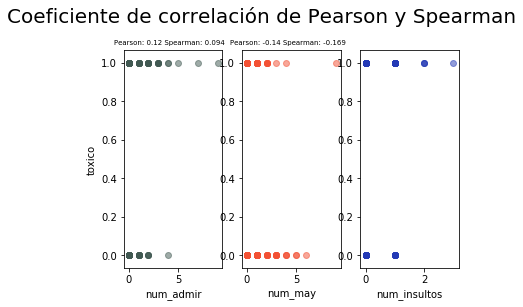

In [69]:
# plot correlated values
#plt.rcParams['figure.figsize'] = [16, 6]

fig, ax = plt.subplots(nrows=1, ncols=3)

ax=ax.flatten()

cols = ['num_admir', 'num_may', 'num_insultos' ]
colors=['#415952', '#f35134', '#243AB5', '#243AB5']
j=0

for i in ax:
    if j==0:
        i.set_ylabel('toxico')
    i.scatter(df[cols[j]], df['toxico'],  alpha=0.5, color=colors[j])
    i.set_xlabel(cols[j])
    i.set_title('Pearson: %s'%df.corr().loc[cols[j]]['toxico'].round(2)+' Spearman: %s   '%df.corr(method='spearman').loc[cols[j]]['toxico'].round(3), fontsize=7)
    j+=1

plt.title('Coeficiente de correlación de Pearson y Spearman', fontsize=20, y=1.10, x=-1)
plt.show()

In [46]:
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

In [47]:
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

In [48]:
Cosas que sigo queriendo hacer: 
    https://marcobonzanini.com/2015/04/01/mining-twitter-data-with-python-part-5-data-visualisation-basics/ 
        (Preparion for data visualisation)
        que pareece que es lo mismo que el final de https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-2-333514854913


SyntaxError: invalid syntax (<ipython-input-48-422a5ef9c229>, line 1)